## Emergency Healthcare Model
Predicting urgency level to optimize resource allocation and improve emergency response efficiency.

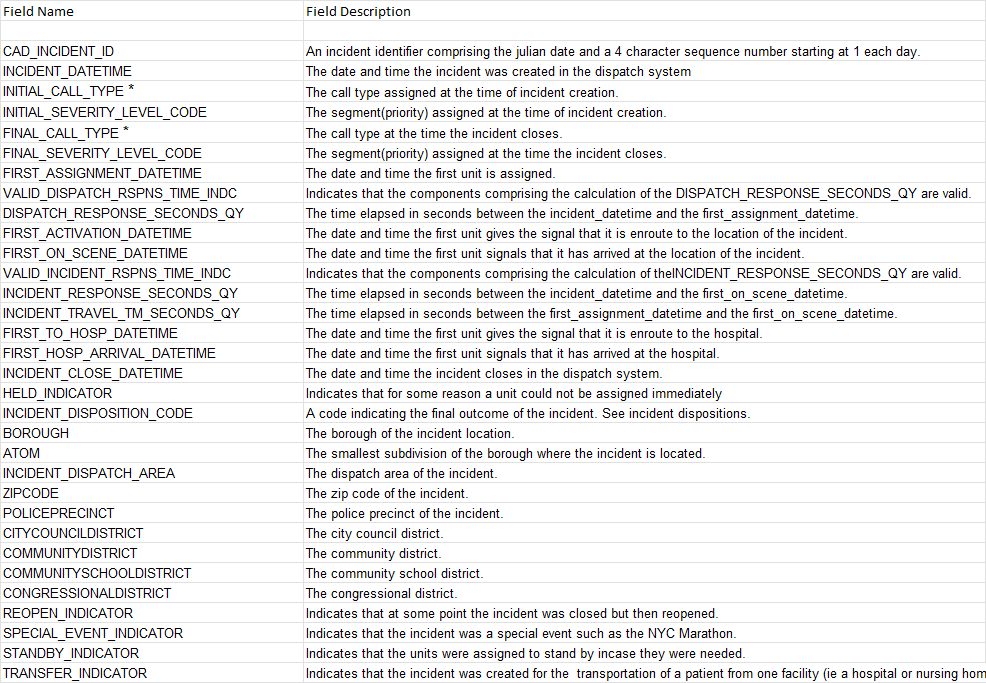

#### Installing necessary libraries

In [1]:
from google.colab import files
files.upload()  # Manually upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"talabidamilare","key":"6f757ce7094ab037d011d041e41610ac"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d new-york-city/ny-ems-incident-dispatch-data



Dataset URL: https://www.kaggle.com/datasets/new-york-city/ny-ems-incident-dispatch-data
License(s): CC0-1.0


In [4]:
import zipfile

with zipfile.ZipFile("ny-ems-incident-dispatch-data.zip", "r") as zip_ref:
    zip_ref.extractall("ny-ems-data")  # Extract to a folder

#### Importing necessary libraries

In [5]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### Loading the Dataset

In [7]:
import pandas as pd

file_path = "/content/ny-ems-data/ems-incident-dispatch-data.csv"


In [8]:
# Load only first 1000 rows to inspect structure
df_sample = pd.read_csv(file_path, nrows=1000)

##### Overview of the dataset

In [9]:
#to display all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sample.head(20)

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
0,202134231,2020-07-31T23:59:51.000,UNC,2,UNC,2,2020-08-01T00:00:19.000,Y,28,2020-08-01T00:00:34.000,2020-08-01T00:05:59.000,Y,368.0,340.0,2020-08-01T00:24:05.000,2020-08-01T00:30:28.000,2020-08-01T01:07:12.000,N,82.0,BROOKLYN,K7,11211.0,94.0,34.0,301.0,14.0,12.0,N,N,N,N
1,202134230,2020-07-31T23:59:50.000,UNC,2,UNC,2,2020-08-01T00:00:15.000,Y,25,2020-08-01T00:00:22.000,2020-08-01T00:06:06.000,Y,376.0,351.0,NaN,NaN,2020-08-01T00:36:34.000,N,93.0,QUEENS,Q3,11419.0,106.0,28.0,410.0,27.0,5.0,N,N,N,N
2,202134229,2020-07-31T23:59:27.000,MVAINJ,4,MVAINJ,4,2020-07-31T23:59:38.000,Y,11,2020-07-31T23:59:49.000,2020-08-01T00:10:35.000,Y,668.0,657.0,NaN,NaN,2020-08-01T00:24:43.000,N,96.0,MANHATTAN,M4,10025.0,24.0,7.0,107.0,3.0,13.0,N,N,N,N
3,202134228,2020-07-31T23:58:54.000,SICK,6,SICK,6,2020-08-01T00:00:30.000,Y,96,2020-08-01T00:00:38.000,2020-08-01T00:09:43.000,Y,649.0,553.0,2020-08-01T00:17:30.000,2020-08-01T00:39:21.000,2020-08-01T01:21:34.000,N,82.0,BROOKLYN,K7,11221.0,81.0,41.0,303.0,16.0,8.0,Y,N,N,N
4,202134226,2020-07-31T23:58:43.000,EDP,7,EDPC,7,2020-07-31T23:59:17.000,Y,34,2020-07-31T23:59:30.000,2020-08-01T00:10:27.000,Y,704.0,670.0,NaN,NaN,2020-08-01T00:55:27.000,N,87.0,QUEENS,Q2,11434.0,113.0,27.0,412.0,29.0,5.0,N,N,N,N
5,202134225,2020-07-31T23:58:02.000,EDP,7,EDP,7,2020-07-31T23:58:40.000,Y,38,2020-07-31T23:58:53.000,2020-08-01T00:06:08.000,Y,486.0,448.0,NaN,NaN,2020-08-01T00:51:29.000,N,93.0,BRONX,B2,10456.0,44.0,16.0,204.0,9.0,15.0,N,N,N,N
6,202134224,2020-07-31T23:57:57.000,UNKNOW,4,ALTMEN,3,2020-07-31T23:58:06.000,Y,9,2020-07-31T23:58:17.000,2020-08-01T00:03:08.000,Y,311.0,302.0,NaN,NaN,2020-08-01T00:30:39.000,N,90.0,QUEENS,Q6,11368.0,115.0,21.0,403.0,30.0,14.0,N,N,N,N
7,202134223,2020-07-31T23:57:51.000,OTHER,6,OTHER,6,2020-08-01T00:27:05.000,Y,1754,2020-08-01T00:27:27.000,2020-08-01T00:30:58.000,Y,1987.0,233.0,NaN,NaN,2020-08-01T00:51:00.000,N,93.0,QUEENS,Q1,11692.0,101.0,31.0,414.0,27.0,5.0,Y,N,N,N
8,202134222,2020-07-31T23:56:52.000,SICK,6,SICK,6,2020-07-31T23:59:17.000,Y,145,2020-07-31T23:59:30.000,2020-08-01T00:18:17.000,Y,1285.0,1140.0,2020-08-01T00:49:06.000,2020-08-01T01:12:37.000,2020-08-01T01:54:10.000,N,82.0,MANHATTAN,M8,10030.0,32.0,9.0,110.0,5.0,13.0,Y,N,N,N
9,202134221,2020-07-31T23:56:24.000,INJURY,5,INJURY,5,2020-07-31T23:56:54.000,Y,30,2020-07-31T23:57:51.000,2020-08-01T00:02:45.000,Y,381.0,351.0,2020-08-01T00:37:03.000,2020-08-01T01:00:51.000,2020-08-01T01:40:21.000,N,82.0,BRONX,B2,10457.0,48.0,17.0,206.0,12.0,15.0,Y,N,N,N


In [10]:
# Check column data types
print(df_sample.dtypes)

CAD_INCIDENT_ID                     int64
INCIDENT_DATETIME                  object
INITIAL_CALL_TYPE                  object
INITIAL_SEVERITY_LEVEL_CODE         int64
FINAL_CALL_TYPE                    object
FINAL_SEVERITY_LEVEL_CODE           int64
FIRST_ASSIGNMENT_DATETIME          object
VALID_DISPATCH_RSPNS_TIME_INDC     object
DISPATCH_RESPONSE_SECONDS_QY        int64
FIRST_ACTIVATION_DATETIME          object
FIRST_ON_SCENE_DATETIME            object
VALID_INCIDENT_RSPNS_TIME_INDC     object
INCIDENT_RESPONSE_SECONDS_QY      float64
INCIDENT_TRAVEL_TM_SECONDS_QY     float64
FIRST_TO_HOSP_DATETIME             object
FIRST_HOSP_ARRIVAL_DATETIME        object
INCIDENT_CLOSE_DATETIME            object
HELD_INDICATOR                     object
INCIDENT_DISPOSITION_CODE         float64
BOROUGH                            object
INCIDENT_DISPATCH_AREA             object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               

Total number of rows in the data set

In [11]:
import csv

with open(file_path, 'r', encoding='utf-8') as f:
    row_count = sum(1 for row in f) - 1  # Subtract header row
print(f"Total rows: {row_count}")


Total rows: 20755333


Iterating over the 20.75 million-row dataset in chunks, counting occurrences of each unique value in the INITIAL_SEVERITY_LEVEL_CODE column.

In [12]:
chunk_size = 100000

value_counts = {}

for chunk in pd.read_csv(file_path, chunksize=chunk_size, usecols=['INITIAL_SEVERITY_LEVEL_CODE']):  # Change column name
    chunk_counts = chunk['INITIAL_SEVERITY_LEVEL_CODE'].value_counts()
    for category, count in chunk_counts.items():
        value_counts[category] = value_counts.get(category, 0) + count

value_counts_series = pd.Series(value_counts)
value_counts_df = value_counts_series.to_frame()
value_counts_df



,0
4,4315961
2,4230583
5,3815768
3,2573986
7,1908213
6,3528142
1,304198
8,78214
9,267
0,1


Visualize the Distribution

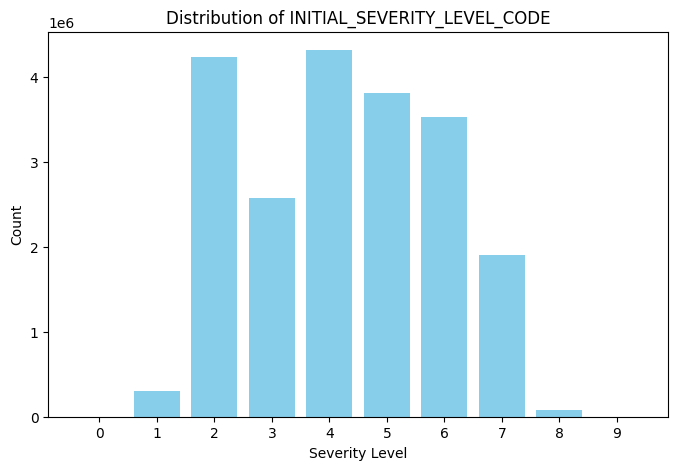

In [13]:
import matplotlib.pyplot as plt

labels = list(value_counts.keys())
sizes = list(value_counts.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.title("Distribution of INITIAL_SEVERITY_LEVEL_CODE")
plt.xticks(labels)
plt.show()


Level 4 , Level 2 , and Level 5 are the most frequent.

This suggests that most incidents fall into these three severity levels.

### Sampling the Dataset based on the severity
This is because the dataset is too large to process

In [14]:
file_path = "/content/ny-ems-data/ems-incident-dispatch-data.csv"
chunk_size = 100000  # Read in chunks
sampled_data = []  # Store samples

In [15]:
# Dictionary to track counts per severity level
max_samples = 10000
severity_counts = {}

In [16]:
# Read dataset in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Ensure column name is correct
    severity_col = "INITIAL_SEVERITY_LEVEL_CODE"

    # Process each severity level separately
    for level in chunk[severity_col].unique():
        # Check if we've already reached the limit for this level
        if severity_counts.get(level, 0) >= max_samples:
            continue

        # Get rows of this severity level
        level_data = chunk[chunk[severity_col] == level]

        # Sample up to remaining needed rows
        remaining = max_samples - severity_counts.get(level, 0)
        level_sample = level_data.sample(n=min(remaining, len(level_data)), random_state=42)

        # Update counts and store sampled data
        severity_counts[level] = severity_counts.get(level, 0) + len(level_sample)
        sampled_data.append(level_sample)

    # Stop early if we have enough data for all levels
    if all(count >= max_samples for count in severity_counts.values()):
        break

In [17]:
# Combine sampled data
final_df = pd.concat(sampled_data)

In [18]:
# Save the new dataset
output_path = "/content/ny-ems-data/sampled_ems-incident-dispatch-data.csv"
final_df.to_csv(output_path, index=False)

print(f"New dataset saved with {len(final_df)} rows at: {output_path}")

New dataset saved with 80268 rows at: /content/ny-ems-data/sampled_ems-incident-dispatch-data.csv


## Overview of the new dataset

In [19]:
df = final_df

In [20]:
df.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
68770,201952963,2020-07-13T17:33:32.000,UNC,2,UNC,2,2020-07-13T17:33:46.000,Y,14,2020-07-13T17:34:08.000,2020-07-13T17:42:48.000,Y,556.0,542.0,NaN,NaN,2020-07-13T19:12:12.000,N,83.0,RICHMOND / STATEN ISLAND,S2,10306.0,122.0,50.0,502.0,31.0,11.0,N,N,N,N
83960,201912551,2020-07-09T16:15:08.000,UNC,2,UNC,2,2020-07-09T16:15:22.000,Y,14,2020-07-09T16:15:37.000,2020-07-09T16:20:36.000,Y,328.0,314.0,NaN,NaN,2020-07-09T16:43:45.000,N,93.0,MANHATTAN,M1,10002.0,5.0,1.0,103.0,2.0,7.0,N,N,N,N
54864,201991829,2020-07-17T13:25:46.000,CARDBR,2,CARDBR,2,2020-07-17T13:25:53.000,Y,7,2020-07-17T13:26:01.000,NaN,N,NaN,NaN,2020-07-17T13:45:01.000,2020-07-17T13:55:49.000,2020-07-17T14:36:47.000,N,82.0,MANHATTAN,M3,10022.0,17.0,5.0,106.0,2.0,12.0,N,N,N,N
63936,201964031,2020-07-14T22:45:27.000,MCI21,2,MCI21,2,NaN,N,0,NaN,NaN,N,NaN,NaN,NaN,NaN,2020-07-14T22:46:28.000,N,NaN,MANHATTAN,M1,10013.0,5.0,1.0,102.0,2.0,7.0,N,N,N,N
7783,202113725,2020-07-29T21:26:06.000,CARDBR,2,CARDBR,2,2020-07-29T21:26:21.000,Y,15,2020-07-29T21:26:33.000,2020-07-29T21:32:14.000,Y,368.0,353.0,2020-07-29T22:11:34.000,2020-07-29T22:25:26.000,2020-07-29T23:04:22.000,N,82.0,BRONX,B1,10459.0,41.0,17.0,202.0,8.0,15.0,N,N,N,N


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80268 entries, 68770 to 20654464
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CAD_INCIDENT_ID                 80268 non-null  int64  
 1   INCIDENT_DATETIME               80268 non-null  object 
 2   INITIAL_CALL_TYPE               80268 non-null  object 
 3   INITIAL_SEVERITY_LEVEL_CODE     80268 non-null  int64  
 4   FINAL_CALL_TYPE                 80268 non-null  object 
 5   FINAL_SEVERITY_LEVEL_CODE       80268 non-null  int64  
 6   FIRST_ASSIGNMENT_DATETIME       79358 non-null  object 
 7   VALID_DISPATCH_RSPNS_TIME_INDC  80268 non-null  object 
 8   DISPATCH_RESPONSE_SECONDS_QY    80268 non-null  int64  
 9   FIRST_ACTIVATION_DATETIME       79208 non-null  object 
 10  FIRST_ON_SCENE_DATETIME         77281 non-null  object 
 11  VALID_INCIDENT_RSPNS_TIME_INDC  80268 non-null  object 
 12  INCIDENT_RESPONSE_SECONDS_QY  

In [22]:
df.shape

(80268, 31)

we have 80268 rows and 31 columns

##### Summary statistics of the numerical columns

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CAD_INCIDENT_ID,80268.0,2.002993e+08,6.711031e+06,50252724.0,201880098.5,201963137.5,2.020515e+08,202134231.0
INITIAL_SEVERITY_LEVEL_CODE,80268.0,4.514913e+00,2.302157e+00,0.0,3.0,5.0,7.000000e+00,9.0
FINAL_SEVERITY_LEVEL_CODE,80268.0,4.415844e+00,2.255245e+00,1.0,2.0,4.0,6.000000e+00,8.0
DISPATCH_RESPONSE_SECONDS_QY,80268.0,4.038947e+02,2.821628e+03,0.0,10.0,18.0,3.600000e+01,32317.0
INCIDENT_RESPONSE_SECONDS_QY,76783.0,8.335667e+02,2.921299e+03,0.0,275.0,397.0,5.710000e+02,32377.0
INCIDENT_TRAVEL_TM_SECONDS_QY,77281.0,4.419400e+02,4.671546e+02,0.0,247.0,364.0,5.240000e+02,29004.0
INCIDENT_DISPOSITION_CODE,79082.0,8.600436e+01,4.835323e+00,82.0,82.0,82.0,9.100000e+01,96.0
POLICEPRECINCT,78298.0,6.331793e+01,3.404262e+01,1.0,40.0,61.0,1.000000e+02,123.0
CITYCOUNCILDISTRICT,78297.0,2.330844e+01,1.479093e+01,1.0,10.0,21.0,3.600000e+01,51.0
COMMUNITYDISTRICT,78298.0,2.666448e+02,1.189184e+02,101.0,201.0,302.0,4.010000e+02,595.0


##### Summary statistics of the categorical columns

In [24]:
df.describe(include = 'object').T

,count,unique,top,freq
INCIDENT_DATETIME,80268,79522,2020-07-26T18:23:53.000,3
INITIAL_CALL_TYPE,80268,105,STNDBY,9745
FINAL_CALL_TYPE,80268,116,STNDBY,8808
FIRST_ASSIGNMENT_DATETIME,79358,78565,2020-07-31T17:00:02.000,3
VALID_DISPATCH_RSPNS_TIME_INDC,80268,6,Y,76227
FIRST_ACTIVATION_DATETIME,79208,78377,2020-07-25T01:15:39.000,3
FIRST_ON_SCENE_DATETIME,77281,76375,2020-07-17T00:54:30.000,3
VALID_INCIDENT_RSPNS_TIME_INDC,80268,6,Y,74336
FIRST_TO_HOSP_DATETIME,40235,40215,2020-07-16T12:15:19.000,2
FIRST_HOSP_ARRIVAL_DATETIME,39954,39407,2020-07-19T15:03:40.000,3


#### Categorizing INITIAL_SEVERITY_LEVEL_CODE into urgency levels based on priority.

For predicting urgency in real-time (for immediate dispatch decisions) → we are using INITIAL_SEVERITY_LEVEL_CODE.

Since we already have severity levels ranging from 0 to 9, we can group them into categories like:

🚑 Suggested Urgency Levels:

Severity Level	 Urgency Level

7, 8, 9	Critical (High Urgency)

4, 5, 6	Moderate (Medium Urgency)

1, 2, 3	Low (Non-Urgent)

0	Unknown (Rare cases)

In [25]:
# Define urgency level mapping
def map_urgency(severity):
    if severity in [7, 8, 9]:
        return "Critical"
    elif severity in [4, 5, 6]:
        return "Moderate"
    elif severity in [1, 2, 3]:
        return "Low"
    else:
        return "Unknown"

In [26]:
# Apply mapping
df["URGENCY_LEVEL"] = df["INITIAL_SEVERITY_LEVEL_CODE"].apply(map_urgency)

In [27]:
# Check distribution
df["URGENCY_LEVEL"].value_counts().to_frame()

,count
URGENCY_LEVEL,
Low,30000
Moderate,30000
Critical,20267
Unknown,1


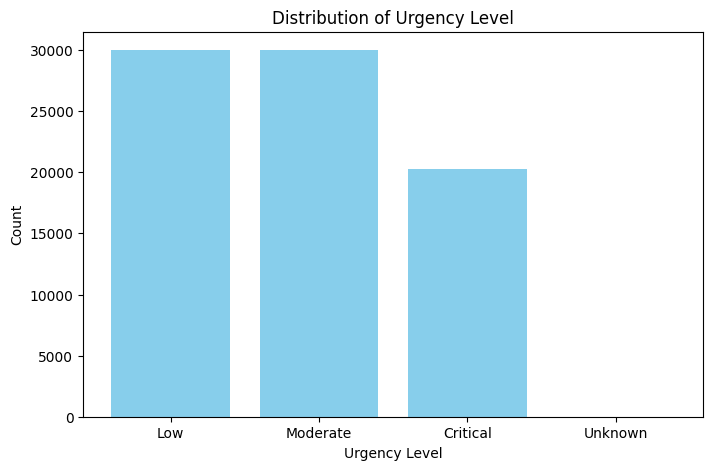

In [28]:
labels = list(df["URGENCY_LEVEL"].value_counts().index.tolist())
sizes = list(df["URGENCY_LEVEL"].value_counts().tolist())

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color='skyblue')
plt.xlabel("Urgency Level")
plt.ylabel("Count")
plt.title("Distribution of Urgency Level")
plt.xticks(labels)
plt.show()

In [29]:
df.head(2)

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,URGENCY_LEVEL
68770,201952963,2020-07-13T17:33:32.000,UNC,2,UNC,2,2020-07-13T17:33:46.000,Y,14,2020-07-13T17:34:08.000,2020-07-13T17:42:48.000,Y,556.0,542.0,NaN,NaN,2020-07-13T19:12:12.000,N,83.0,RICHMOND / STATEN ISLAND,S2,10306.0,122.0,50.0,502.0,31.0,11.0,N,N,N,N,Low
83960,201912551,2020-07-09T16:15:08.000,UNC,2,UNC,2,2020-07-09T16:15:22.000,Y,14,2020-07-09T16:15:37.000,2020-07-09T16:20:36.000,Y,328.0,314.0,NaN,NaN,2020-07-09T16:43:45.000,N,93.0,MANHATTAN,M1,10002.0,5.0,1.0,103.0,2.0,7.0,N,N,N,N,Low


### Exploratory Data analysis and Feature Engineering

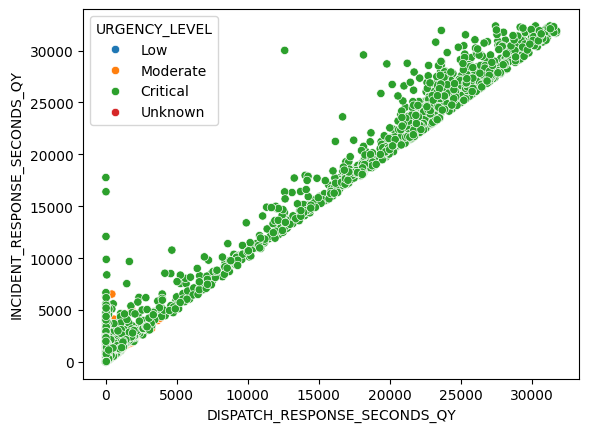

In [30]:
sns.scatterplot(x='DISPATCH_RESPONSE_SECONDS_QY', y='INCIDENT_RESPONSE_SECONDS_QY', data=df, hue='URGENCY_LEVEL')
plt.show()

###### Encoding categorical columns

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["URGENCY_Encoded"] = le.fit_transform(df["URGENCY_LEVEL"])

In [32]:
df["URGENCY_Encoded"].value_counts()

,count
URGENCY_Encoded,
1,30000
2,30000
0,20267
3,1


In [33]:
df.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,HELD_INDICATOR,INCIDENT_DISPOSITION_CODE,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,URGENCY_LEVEL,URGENCY_Encoded
68770,201952963,2020-07-13T17:33:32.000,UNC,2,UNC,2,2020-07-13T17:33:46.000,Y,14,2020-07-13T17:34:08.000,2020-07-13T17:42:48.000,Y,556.0,542.0,NaN,NaN,2020-07-13T19:12:12.000,N,83.0,RICHMOND / STATEN ISLAND,S2,10306.0,122.0,50.0,502.0,31.0,11.0,N,N,N,N,Low,1
83960,201912551,2020-07-09T16:15:08.000,UNC,2,UNC,2,2020-07-09T16:15:22.000,Y,14,2020-07-09T16:15:37.000,2020-07-09T16:20:36.000,Y,328.0,314.0,NaN,NaN,2020-07-09T16:43:45.000,N,93.0,MANHATTAN,M1,10002.0,5.0,1.0,103.0,2.0,7.0,N,N,N,N,Low,1
54864,201991829,2020-07-17T13:25:46.000,CARDBR,2,CARDBR,2,2020-07-17T13:25:53.000,Y,7,2020-07-17T13:26:01.000,NaN,N,NaN,NaN,2020-07-17T13:45:01.000,2020-07-17T13:55:49.000,2020-07-17T14:36:47.000,N,82.0,MANHATTAN,M3,10022.0,17.0,5.0,106.0,2.0,12.0,N,N,N,N,Low,1
63936,201964031,2020-07-14T22:45:27.000,MCI21,2,MCI21,2,NaN,N,0,NaN,NaN,N,NaN,NaN,NaN,NaN,2020-07-14T22:46:28.000,N,NaN,MANHATTAN,M1,10013.0,5.0,1.0,102.0,2.0,7.0,N,N,N,N,Low,1
7783,202113725,2020-07-29T21:26:06.000,CARDBR,2,CARDBR,2,2020-07-29T21:26:21.000,Y,15,2020-07-29T21:26:33.000,2020-07-29T21:32:14.000,Y,368.0,353.0,2020-07-29T22:11:34.000,2020-07-29T22:25:26.000,2020-07-29T23:04:22.000,N,82.0,BRONX,B1,10459.0,41.0,17.0,202.0,8.0,15.0,N,N,N,N,Low,1


In [34]:
df["BOROUGH"].value_counts()

,count
BOROUGH,
BROOKLYN,21907
MANHATTAN,19258
BRONX,18419
QUEENS,17152
RICHMOND / STATEN ISLAND,3499
UNKNOWN,33


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["BOROUGH_ENCODED"] = le.fit_transform(df["BOROUGH"])


Feature Engineering

In [36]:
#ensuring all date/time columns are in the correct format

df["INCIDENT_DATETIME"] = pd.to_datetime(df["INCIDENT_DATETIME"])
df["FIRST_ASSIGNMENT_DATETIME"] = pd.to_datetime(df["FIRST_ASSIGNMENT_DATETIME"])
df["INCIDENT_CLOSE_DATETIME"] = pd.to_datetime(df["INCIDENT_CLOSE_DATETIME"])


Extracting Useful Time Features

In [37]:
df["YEAR"] = df["INCIDENT_DATETIME"].dt.year
df["MONTH"] = df["INCIDENT_DATETIME"].dt.month
df["DAY"] = df["INCIDENT_DATETIME"].dt.day
df["DAY_OF_WEEK"] = df["INCIDENT_DATETIME"].dt.weekday  # 0=Monday, 6=Sunday
df["HOUR"] = df["INCIDENT_DATETIME"].dt.hour
df["WEEKEND"] = (df["DAY_OF_WEEK"] >= 5).astype(int)  # 1 if Sat/Sun, else 0
df["TIME_OF_DAY"] = pd.cut(df["HOUR"], bins=[0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])


In [38]:
df = pd.get_dummies(df, columns=["TIME_OF_DAY"], drop_first=True)

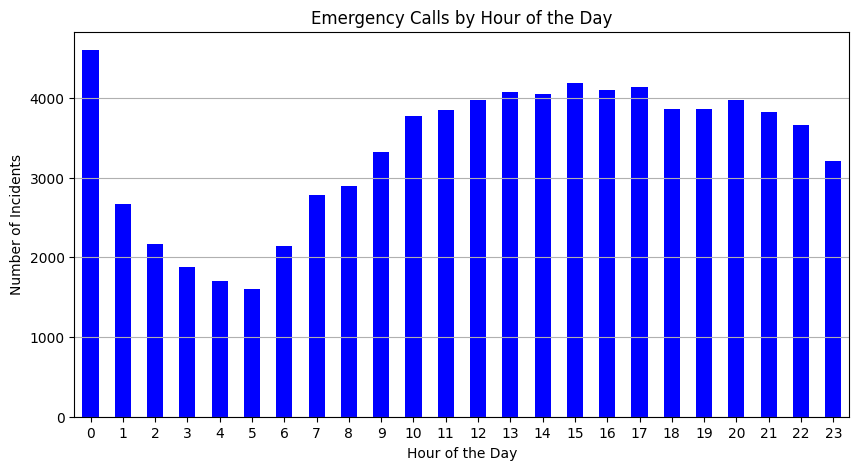

In [39]:
df["HOUR"] = df["INCIDENT_DATETIME"].dt.hour

# Count incidents per hour
hourly_trend = df["HOUR"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
hourly_trend.plot(kind="bar", color="b")
plt.title("Emergency Calls by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


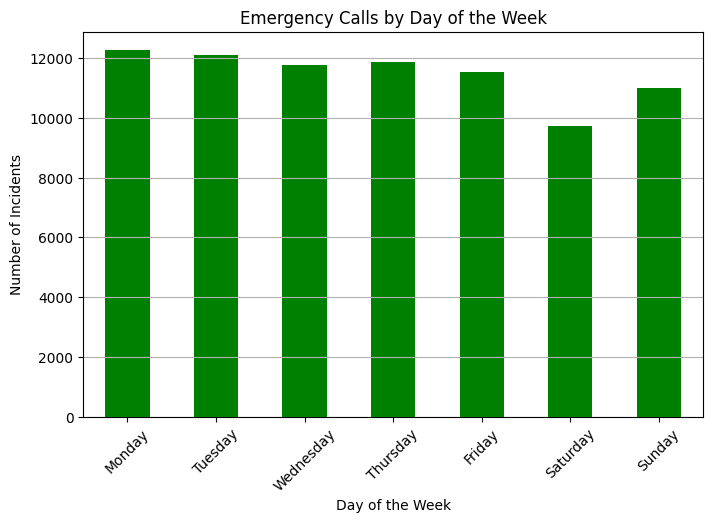

In [40]:
df["DAY_OF_WEEK"] = df["INCIDENT_DATETIME"].dt.day_name()

# Count incidents per day of the week
weekday_trend = df["DAY_OF_WEEK"].value_counts()[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]

# Plot
plt.figure(figsize=(8, 5))
weekday_trend.plot(kind="bar", color="g")
plt.title("Emergency Calls by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Some datetime columns represent response durations, which are crucial for predicting emergency urgency.

📌 Why?

DISPATCH_RESPONSE_TIME → Measures how quickly emergency responders were assigned.

INCIDENT_DURATION → Measures how long the emergency lasted.

In [41]:
df["DISPATCH_RESPONSE_TIME"] = (df["FIRST_ASSIGNMENT_DATETIME"] - df["INCIDENT_DATETIME"]).dt.total_seconds()
df["INCIDENT_DURATION"] = (df["INCIDENT_CLOSE_DATETIME"] - df["INCIDENT_DATETIME"]).dt.total_seconds()

In [42]:
high_incident_zipcodes = df["ZIPCODE"].value_counts().index[:int(0.1 * len(df["ZIPCODE"].unique()))]
df["HIGH_INCIDENT_AREA"] = df["ZIPCODE"].isin(high_incident_zipcodes).astype(int)

In [43]:
df["SEVERITY_CHANGE"] = df["FINAL_SEVERITY_LEVEL_CODE"] - df["INITIAL_SEVERITY_LEVEL_CODE"]
df["CALL_TYPE_CHANGE"] = (df["FINAL_CALL_TYPE"] != df["INITIAL_CALL_TYPE"]).astype(int)


In [44]:
df["INITIAL_CALL_TYPE"].value_counts()

,count
INITIAL_CALL_TYPE,
STNDBY,9745
ARREST,8505
SICK,7785
INJURY,7174
EDP,6760
UNKNOW,5018
UNC,2920
CARD,2791
DRUG,2564


In [45]:
# Define mapping for call categories
call_category_mapping = {
    'Medical': {'SICK', 'INJURY', 'CARD', 'DRUG', 'SEIZR', 'RESPIR', 'ASTHMB', 'CVA', 'OBLAB', 'BURNMA', 'GYNHEM', 'ANAPH', 'TRAUMA'},
    'Fire': {'BURNMA', 'BURNMI', 'INHALE', 'ELECT'},
    'Traffic': {'MVA', 'MVAINJ', 'PEDSTR', 'CVAC', 'STRANS', 'ACC'},
    'Crime': {'ARREST', 'SHOT', 'STAB', 'JUMPDN', 'JUMPUP', 'DDOA'},
    'Mental_Health': {'EDP', 'EDPC', 'ALTMEN', 'ALTMFC', 'UNC', 'UNCFC', 'STNDBM'},
    'Other': {'OTHER', 'SAFE', 'TEST', 'DRILL', 'ACTIVE', 'T-TRMA', 'T-INJ'}
}

# Function to assign category
def categorize_call(call_type):
    for category, types in call_category_mapping.items():
        if call_type in types:
            return category
    return 'Other'  # Default if not found in any category

# Apply categorization
df['CALL_CATEGORY'] = df['INITIAL_CALL_TYPE'].apply(categorize_call)

# Encode CALL_CATEGORY using label encoding
df['CALL_CATEGORY_ENCODED'] = df['CALL_CATEGORY'].astype('category').cat.codes


In [46]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)


Index(['INCIDENT_DATETIME', 'INITIAL_CALL_TYPE', 'FINAL_CALL_TYPE',
       'FIRST_ASSIGNMENT_DATETIME', 'VALID_DISPATCH_RSPNS_TIME_INDC',
       'FIRST_ACTIVATION_DATETIME', 'FIRST_ON_SCENE_DATETIME',
       'VALID_INCIDENT_RSPNS_TIME_INDC', 'FIRST_TO_HOSP_DATETIME',
       'FIRST_HOSP_ARRIVAL_DATETIME', 'INCIDENT_CLOSE_DATETIME',
       'HELD_INDICATOR', 'BOROUGH', 'INCIDENT_DISPATCH_AREA', 'ZIPCODE',
       'REOPEN_INDICATOR', 'SPECIAL_EVENT_INDICATOR', 'STANDBY_INDICATOR',
       'TRANSFER_INDICATOR', 'URGENCY_LEVEL', 'DAY_OF_WEEK',
       'TIME_OF_DAY_Morning', 'TIME_OF_DAY_Afternoon', 'TIME_OF_DAY_Evening',
       'CALL_CATEGORY'],
      dtype='object')


In [47]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32','int8'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

correlation_matrix

,CAD_INCIDENT_ID,INITIAL_SEVERITY_LEVEL_CODE,FINAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,INCIDENT_DISPOSITION_CODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,URGENCY_Encoded,BOROUGH_ENCODED,YEAR,MONTH,DAY,HOUR,WEEKEND,DISPATCH_RESPONSE_TIME,INCIDENT_DURATION,HIGH_INCIDENT_AREA,SEVERITY_CHANGE,CALL_TYPE_CHANGE,CALL_CATEGORY_ENCODED
CAD_INCIDENT_ID,1.000000,-0.367552,-0.269479,-0.195205,-0.213198,-0.113741,-0.123359,-0.015024,0.002486,-0.015773,-0.009369,0.047702,0.349489,-0.066294,0.998042,-0.077749,0.066676,0.097849,-0.009261,-0.234516,-0.278255,0.032907,0.254918,-0.067900,-0.191412
INITIAL_SEVERITY_LEVEL_CODE,-0.367552,1.000000,0.915970,0.198129,0.229345,0.227526,0.223578,-0.034998,-0.044563,-0.035892,-0.042850,-0.017475,-0.320776,0.032600,-0.377846,0.205387,-0.002193,-0.082039,-0.024168,0.213957,0.261955,-0.007075,-0.252779,0.087942,0.378598
FINAL_SEVERITY_LEVEL_CODE,-0.269479,0.915970,1.000000,0.206812,0.237829,0.225582,0.230939,-0.036940,-0.049093,-0.037949,-0.045481,-0.013464,-0.291208,0.026230,-0.279399,0.188979,0.002293,-0.083822,-0.025531,0.224101,0.271277,-0.003966,0.156679,-0.022995,0.355135
DISPATCH_RESPONSE_SECONDS_QY,-0.195205,0.198129,0.206812,1.000000,0.992139,0.279774,0.101226,-0.023911,-0.003365,-0.028157,-0.027186,-0.010336,-0.180864,0.027644,-0.192183,-0.025539,-0.019830,-0.219077,-0.001752,0.586996,0.533547,0.014268,0.010999,-0.043014,0.106884
INCIDENT_RESPONSE_SECONDS_QY,-0.213198,0.229345,0.237829,0.992139,1.000000,0.405802,0.106384,-0.027550,-0.007062,-0.034038,-0.030988,-0.005080,-0.197549,0.028012,-0.210461,-0.020021,-0.021864,-0.222355,-0.002748,0.992139,0.612676,0.020288,0.007525,-0.040790,0.120910
INCIDENT_TRAVEL_TM_SECONDS_QY,-0.113741,0.227526,0.225582,0.279774,0.405802,1.000000,0.077836,-0.026853,-0.019708,-0.039471,-0.026529,0.029376,-0.137982,0.025551,-0.116522,0.057125,-0.004563,-0.091736,0.000309,0.311887,0.273996,0.029243,-0.016619,-0.000244,0.117730
INCIDENT_DISPOSITION_CODE,-0.123359,0.223578,0.230939,0.101226,0.106384,0.077836,1.000000,-0.033716,-0.030848,-0.036100,-0.035805,0.007447,-0.091502,0.003304,-0.125742,0.049581,0.000633,-0.012497,0.006086,0.112129,0.033436,0.004238,0.006130,-0.009512,0.151667
POLICEPRECINCT,-0.015024,-0.034998,-0.036940,-0.023911,-0.027550,-0.026853,-0.033716,1.000000,0.702550,0.972698,0.940996,-0.516879,-0.006760,0.497028,-0.012269,-0.041659,-0.001149,0.009236,0.010352,-0.041600,-0.020370,-0.306950,-0.002877,-0.007993,-0.004538
CITYCOUNCILDISTRICT,0.002486,-0.044563,-0.049093,-0.003365,-0.007062,-0.019708,-0.030848,0.702550,1.000000,0.775472,0.758041,-0.470711,0.014084,0.140777,0.004554,-0.032420,-0.001453,0.006414,0.014376,-0.022356,-0.068116,-0.181624,-0.008605,-0.012110,-0.017495
COMMUNITYDISTRICT,-0.015773,-0.035892,-0.037949,-0.028157,-0.034038,-0.039471,-0.036100,0.972698,0.775472,1.000000,0.960139,-0.534909,-0.006322,0.474845,-0.013046,-0.041067,-0.001652,0.011168,0.012478,-0.045374,-0.033978,-0.318979,-0.003107,-0.009145,-0.007892


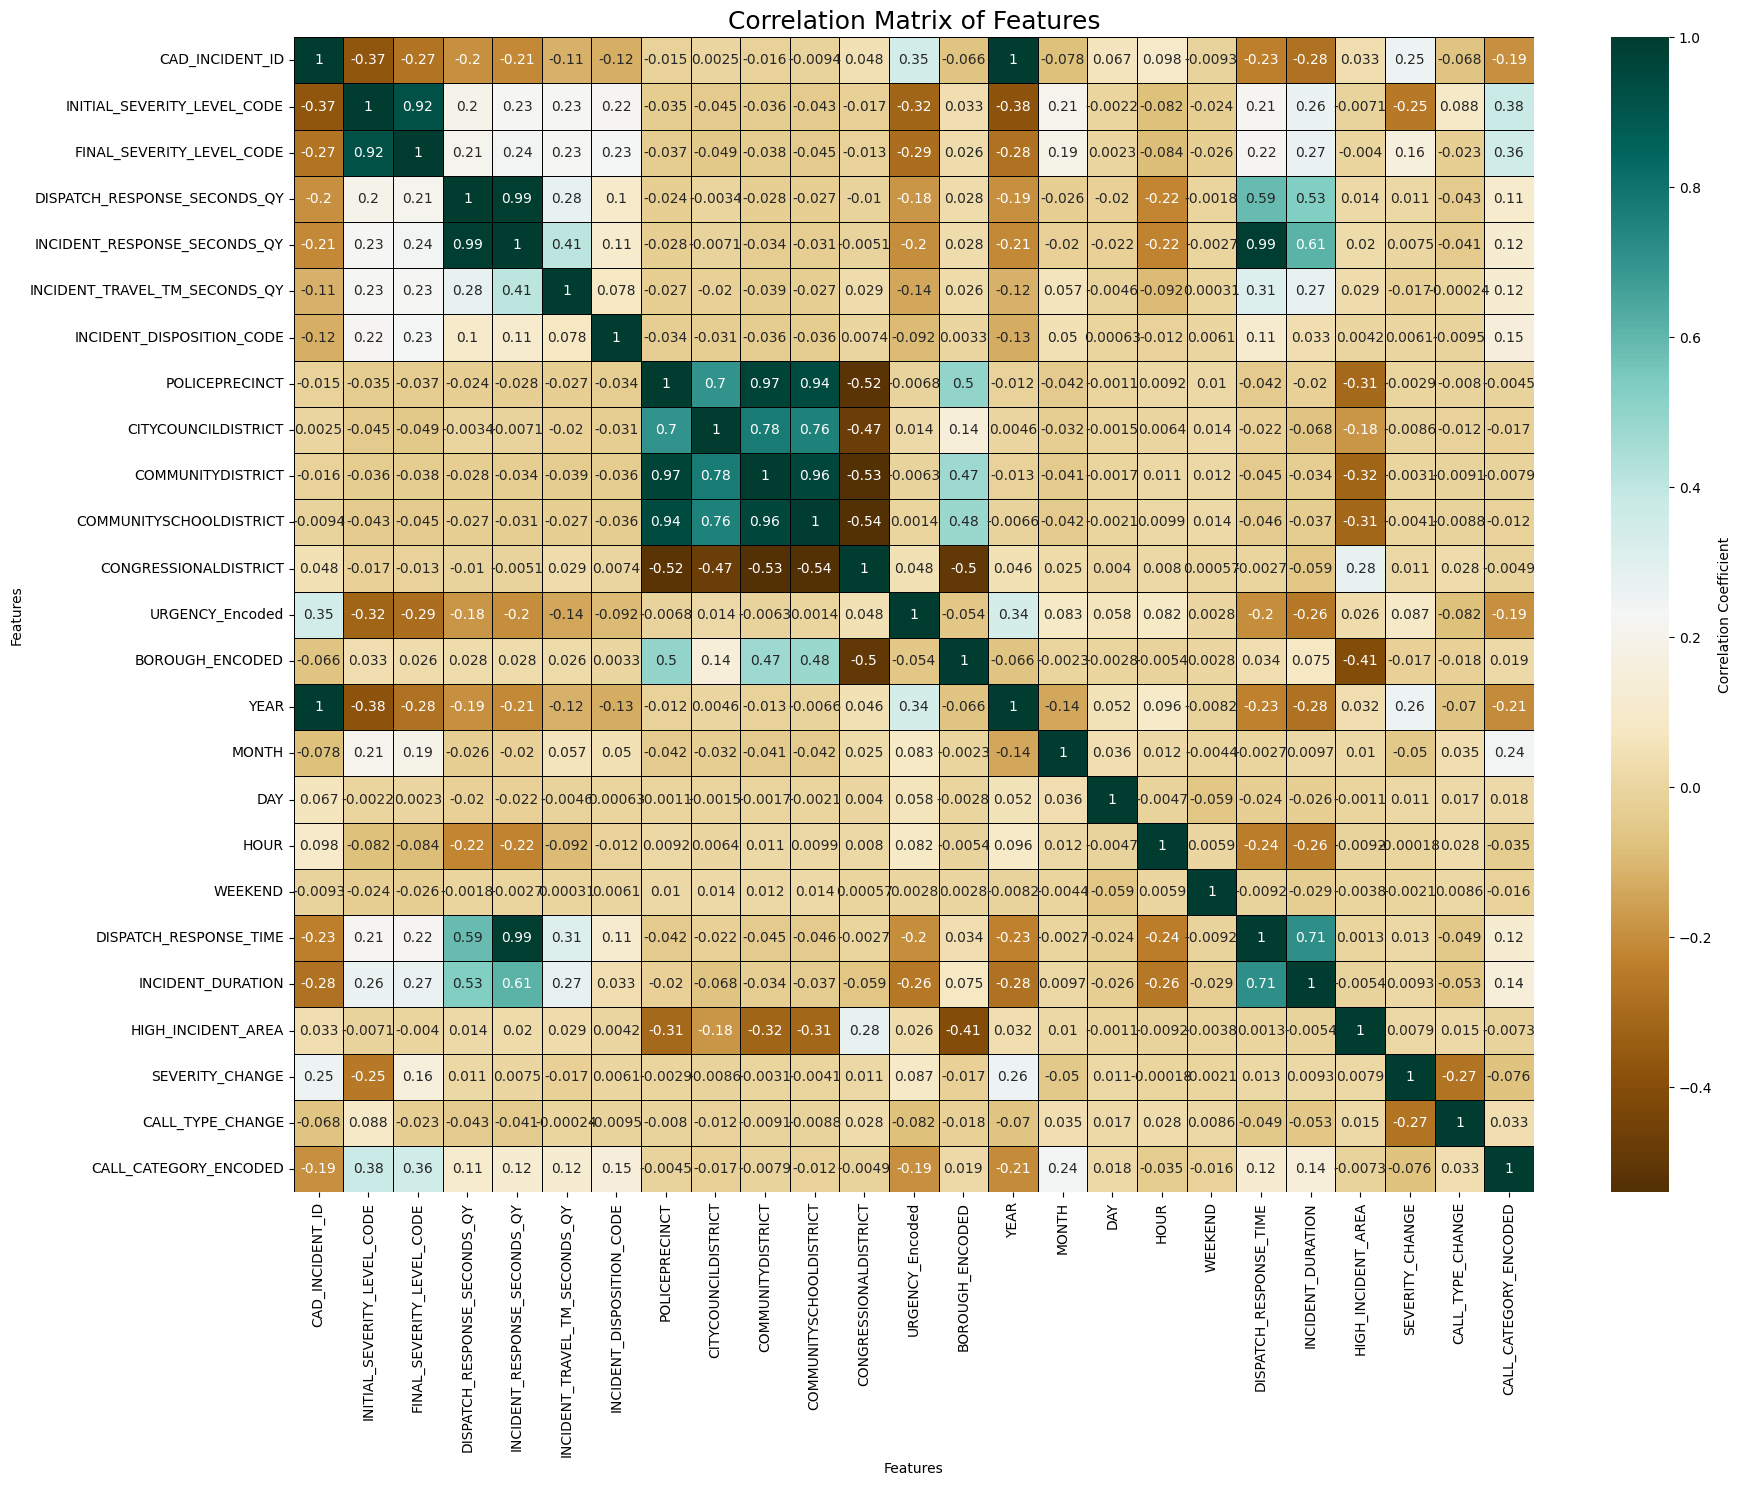

In [48]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="BrBG",
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Features', fontsize=18)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)

plt.show()

### Modelling

Selected features for building the model will be:

    'DISPATCH_RESPONSE_SECONDS_QY', 'INCIDENT_RESPONSE_SECONDS_QY'
    'INCIDENT_TRAVEL_TM_SECONDS_QY',
    'YEAR', 'INITIAL_SEVERITY_LEVEL_CODE', 'CALL_CATEGORY_ENCODED',
    'INCIDENT_DURATION'

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

Splitting my data into training and testing sets

In [50]:
df = df[df['URGENCY_Encoded'] < 3]

In [51]:
# Split features (X) and target (y)
X = df[[
    'DISPATCH_RESPONSE_SECONDS_QY',
    'INCIDENT_RESPONSE_SECONDS_QY',
    'INCIDENT_TRAVEL_TM_SECONDS_QY',
    'YEAR',
    'HOUR',
    'CALL_CATEGORY_ENCODED',
    'INCIDENT_DURATION',
    'DISPATCH_RESPONSE_TIME'
]]

y = df['URGENCY_Encoded']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


In [53]:
X_train.columns

Index(['DISPATCH_RESPONSE_SECONDS_QY', 'INCIDENT_RESPONSE_SECONDS_QY',
       'INCIDENT_TRAVEL_TM_SECONDS_QY', 'YEAR', 'HOUR',
       'CALL_CATEGORY_ENCODED', 'INCIDENT_DURATION', 'DISPATCH_RESPONSE_TIME'],
      dtype='object')

Scaling my data to ensure that each feature contributes equally to the distance calculations or the optimization process.

In [54]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

### Traditional Machine Learning Algorithms

#### Decision Trees

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score

In [56]:
depth_range = range(1, 10)
jaccard_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train_scaled, y_train)
    dt_ypred = dt.predict(X_test_scaled)
    jaccard_score_.append(jaccard_score(y_test, dt_ypred, average="weighted"))
    f1_score_.append(f1_score(y_test, dt_ypred, average="weighted"))

In [57]:
# Creating a df to check the best value of max_depth

result = pd.DataFrame([jaccard_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrics'
result

Evaluation Metrics,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.244487,0.383199,0.480121,0.546866,0.555485,0.581639,0.594643,0.599036,0.599701
F1,0.349945,0.549745,0.645208,0.704698,0.711361,0.734431,0.744117,0.747553,0.748182


In [58]:
from sklearn.model_selection import cross_val_score

depths = range(1, 10)
f1_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    f1 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="f1_weighted"))
    f1_scores.append(f1)

best_depth = depths[np.argmax(f1_scores)]
print(f"Best depth: {best_depth} (F1: {max(f1_scores):.4f})")

Best depth: 9 (F1: 0.7530)


In [59]:
# Main Model
dt_model  = DecisionTreeClassifier(criterion = 'gini', max_depth = 9)

In [60]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=9)

In [61]:
dt_yprob = dt_model.predict_proba(X_test_scaled)  # Get probabilities
dt_yprob = dt_yprob[:, :3]  # Keep only first 3 classes
dt_yprob = dt_yprob / dt_yprob.sum(axis=1, keepdims=True)  # Normalize

In [62]:
dt_ypred = np.argmax(dt_yprob, axis=1)   # Class with highest probability

In [63]:
# Define Urgency Labels
urgency_labels = ["Low Urgency", "Medium Urgency", "High Urgency"]

In [64]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test,dt_ypred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, dt_ypred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (includes precision, recall, and F1-score)
report = classification_report(y_test, dt_ypred)
print(f"Classification Report:\n{report}")

# AUC-ROC SCORE
auc = roc_auc_score(y_test, dt_yprob, multi_class="ovr")
print(f"Auc-roc score:\n{auc}")

Accuracy: 0.7484039087947882
Confusion Matrix:
[[2886  414  276]
 [ 632 4090 1192]
 [  31 1317 4512]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3576
           1       0.70      0.69      0.70      5914
           2       0.75      0.77      0.76      5860

    accuracy                           0.75     15350
   macro avg       0.76      0.76      0.76     15350
weighted avg       0.75      0.75      0.75     15350

Auc-roc score:
0.9031010733271335


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)  # Add non-linear relationships
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=0.1)
log_reg.fit(X_train_poly, y_train)

LogisticRegression(C=0.1, multi_class='multinomial')

In [67]:
# Make predictions
log_ypred = log_reg.predict(X_test_poly)

In [68]:
log_yprob = log_reg.predict_proba(X_test_poly)

In [69]:
log_yprob = log_yprob[:, :3]
log_yprob = log_yprob / log_yprob.sum(axis=1, keepdims=True)

In [70]:
# Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test,log_ypred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, log_ypred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (includes precision, recall, and F1-score)
report = classification_report(y_test, log_ypred)
print(f"Classification Report:\n{report}")

# AUC-ROC SCORE
auc = roc_auc_score(y_test, log_yprob, multi_class="ovr")
print(f"Auc-roc score:\n{auc:.4f}")

Accuracy: 0.546970684039088
Confusion Matrix:
[[1513  627 1436]
 [  61 3670 2183]
 [ 137 2510 3213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57      3576
           1       0.54      0.62      0.58      5914
           2       0.47      0.55      0.51      5860

    accuracy                           0.55     15350
   macro avg       0.63      0.53      0.55     15350
weighted avg       0.59      0.55      0.55     15350

Auc-roc score:
0.7342


Hyperparameter Tuning for Logistic Regression to Optimize and Improve its performance

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


# Define the parameter distribution
param_dist = {
    'C': loguniform(1e-4, 1e4),  # Sample log-uniformly from a wide range
    'penalty': ['l1', 'l2'],  # Avoid 'elasticnet' since it requires `l1_ratio`
    'solver': ['liblinear', 'saga']  # Compatible with L1 and L2 penalties
}

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=500)

# Perform Randomized Search (faster alternative to GridSearch)
random_search = RandomizedSearchCV(
    logreg, param_distributions=param_dist, n_iter=15,
    cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42, verbose=1
)
random_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)

# Best Model
best_logreg = random_search.best_estimator_

# Evaluate on test data
y_pred = best_logreg.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, log_ypred)
print(f"Confusion Matrix:\n{cm}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'C': np.float64(7.849159562555091), 'penalty': 'l2', 'solver': 'saga'}
Test Accuracy: 0.5419543973941368
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.41      0.56      3576
           1       0.53      0.64      0.58      5914
           2       0.46      0.53      0.49      5860

    accuracy                           0.54     15350
   macro avg       0.63      0.52      0.55     15350
weighted avg       0.59      0.54      0.54     15350

Confusion Matrix:
[[1513  627 1436]
 [  61 3670 2183]
 [ 137 2510 3213]]


In [84]:
log_yprob = best_logreg.predict_proba(X_test_scaled)

log_yprob = log_yprob[:, :3]
log_yprob = log_yprob / log_yprob.sum(axis=1, keepdims=True)

# AUC-ROC SCORE
auc = roc_auc_score(y_test, log_yprob, multi_class="ovr")
print(f"Auc-roc score:\n{auc:.4f}")

Auc-roc score:
0.7266


### Ensemble Models

####  Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_ypred = rf_model.predict(X_test_scaled)
rf_yprob = rf_model.predict_proba(X_test_scaled)

rf_yprob = rf_yprob[:, :3]
rf_yprob = rf_yprob / rf_yprob.sum(axis=1, keepdims=True)

# Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test,rf_ypred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, rf_ypred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (includes precision, recall, and F1-score)
report = classification_report(y_test, rf_ypred)
print(f"Classification Report:\n{report}")

# AUC-ROC SCORE
auc = roc_auc_score(y_test, rf_yprob, multi_class="ovr")
print(f"Auc-roc score:\n{auc:.4f}")



Accuracy: 0.7352442996742671
Confusion Matrix:
[[2773  509  294]
 [ 533 3864 1517]
 [  87 1124 4649]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3576
           1       0.70      0.65      0.68      5914
           2       0.72      0.79      0.75      5860

    accuracy                           0.74     15350
   macro avg       0.75      0.74      0.74     15350
weighted avg       0.74      0.74      0.73     15350

Auc-roc score:
0.8959


Hyperparameter Tuning for Random Forest to Optimize and Improve its performance

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform



rf_param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees
    'max_depth': randint(3, 20),  # Depth of trees
    'min_samples_split': randint(2, 10),  # Min samples to split a node
    'min_samples_leaf': randint(1, 10),  # Min samples at a leaf
    'bootstrap': [True, False]  # Use bootstrap samples or not
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_search = RandomizedSearchCV(
    rf_model, param_distributions=rf_param_dist,
    n_iter=15, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42, verbose=1
)
rf_search.fit(X_train_scaled, y_train)

# Best Random Forest Model
best_rf = rf_search.best_estimator_
print("Best Random Forest Parameters:", rf_search.best_params_)

# Evaluate
rf_pred = best_rf.predict(X_test_scaled)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_ypred)
print(f"Confusion Matrix:\n{cm}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 241}
Random Forest Test Accuracy: 0.7510097719869707
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      3576
           1       0.71      0.71      0.71      5914
           2       0.74      0.79      0.77      5860

    accuracy                           0.75     15350
   macro avg       0.77      0.75      0.76     15350
weighted avg       0.75      0.75      0.75     15350

Confusion Matrix:
[[2773  509  294]
 [ 533 3864 1517]
 [  87 1124 4649]]


In [81]:
rf_yprob = best_rf.predict_proba(X_test_scaled)

rf_yprob = rf_yprob[:, :3]
rf_yprob = rf_yprob / rf_yprob.sum(axis=1, keepdims=True)

# AUC-ROC SCORE
auc = roc_auc_score(y_test, rf_yprob, multi_class="ovr")
print(f"Auc-roc score:\n{auc:.4f}")


Auc-roc score:
0.9062


### Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
gb_ypred = gb_model.predict(X_test_scaled)
gb_yprob = gb_model.predict_proba(X_test_scaled)

gb_yprob = gb_yprob[:, :3]
gb_yprob = gb_yprob / gb_yprob.sum(axis=1, keepdims=True)

# Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test,gb_ypred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, gb_ypred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (includes precision, recall, and F1-score)
report = classification_report(y_test, gb_ypred)
print(f"Classification Report:\n{report}")

# AUC-ROC SCORE
auc = roc_auc_score(y_test, gb_yprob, multi_class="ovr")
print(f"Auc-roc score:\n{auc:.4f}")


Accuracy: 0.7522475570032573
Confusion Matrix:
[[2793  459  324]
 [ 529 4034 1351]
 [  27 1113 4720]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      3576
           1       0.72      0.68      0.70      5914
           2       0.74      0.81      0.77      5860

    accuracy                           0.75     15350
   macro avg       0.76      0.76      0.76     15350
weighted avg       0.75      0.75      0.75     15350

Auc-roc score:
0.9079


Hyperparameter Tuning for Gradient Boosting to Optimize and Improve its performance

In [82]:
from sklearn.model_selection import RandomizedSearchCV


# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,  # Limits the number of parameter combinations
    cv=3,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best model
best_gb = random_search.best_estimator_

# Make predictions
gb_ypred = best_gb.predict(X_test_scaled)
gb_ypred_proba = best_gb.predict_proba(X_test_scaled)  # Needed for AUC-ROC

# Evaluation
accuracy = best_gb.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, gb_ypred)
class_report = classification_report(y_test, gb_ypred)
auc_score = roc_auc_score(y_test, gb_ypred_proba, multi_class="ovr")

print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"AUC-ROC Score: {auc_score:.4f}")


Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.7528
Confusion Matrix:
[[2783  466  327]
 [ 521 4038 1355]
 [  29 1097 4734]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      3576
           1       0.72      0.68      0.70      5914
           2       0.74      0.81      0.77      5860

    accuracy                           0.75     15350
   macro avg       0.76      0.76      0.76     15350
weighted avg       0.75      0.75      0.75     15350

AUC-ROC Score: 0.9079


In [83]:
importances = best_gb.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


CALL_CATEGORY_ENCODED: 0.6414
YEAR: 0.2222
INCIDENT_DURATION: 0.0571
INCIDENT_RESPONSE_SECONDS_QY: 0.0488
INCIDENT_TRAVEL_TM_SECONDS_QY: 0.0200
DISPATCH_RESPONSE_SECONDS_QY: 0.0046
DISPATCH_RESPONSE_TIME: 0.0043
HOUR: 0.0016



### **Model Performance Analysis**

 Here’s a breakdown of their performances:

| Model                     | Accuracy | AUC-ROC | Best Hyperparameters Used |
|---------------------------|----------|---------|---------------------------|
| **Decision Tree**         | 0.7484   | 0.9031  | max_depth = 9             |
| **Logistic Regression**   | 0.5469   | 0.7342  | C = 456.61, penalty = l2, solver = saga |
| **Random Forest**         | 0.7510   | 0.9062  | max_depth = 11, n_estimators = 181, min_samples_split = 3, min_samples_leaf = 7 |
| **Gradient Boosting**     | 0.7528   | 0.9079  | learning_rate = 0.0546, max_depth = 5, n_estimators = 64, min_samples_split = 3, min_samples_leaf = 3 |

---

### **Observations**
1. **Gradient Boosting performed the best overall**, achieving an **AUC-ROC score of 0.9079**, meaning it distinguishes between the urgency levels more effectively than other models.
2. **Random Forest** had a **slightly lower accuracy (0.7510) than Gradient Boosting (0.7528)** and a lower AUC-ROC (0.9062 vs. 0.9079), meaning it is slightly less effective in ranking predictions.
3. **Decision Tree performed well** (Accuracy: 0.7484, AUC: 0.9031), but it is a simpler model compared to the ensemble methods.
4. **Logistic Regression was the weakest performer**, struggling with capturing the complexity of the data, even after hyperparameter tuning.

---



Saving the best model

In [85]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(best_gb, "best_gradient_boosting_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [86]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

DEPLOYMENT

In [88]:
code_content = '''
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the saved model and scaler
best_gb = joblib.load("best_gradient_boosting_model.pkl")
scaler = joblib.load("scaler.pkl")  # Save your StandardScaler separately

# Define urgency labels
urgency_labels = ["Low Urgency", "Medium Urgency", "High Urgency"]

# Streamlit app title
st.title("Emergency Urgency Level Prediction")

st.write("This app predicts the urgency level of an emergency call based on given features.")

# Sidebar for user input
st.sidebar.header("User Input Features")

# Input fields
def user_input_features():
    DISPATCH_RESPONSE_SECONDS_QY = st.sidebar.number_input("Dispatch Response Time (seconds)", min_value=0)
    INCIDENT_RESPONSE_SECONDS_QY = st.sidebar.number_input("Incident Response Time (seconds)", min_value=0)
    INCIDENT_TRAVEL_TM_SECONDS_QY = st.sidebar.number_input("Incident Travel Time (seconds)", min_value=0)
    YEAR = st.sidebar.number_input("Year", min_value=2000, max_value=2050, value=2024)
    CALL_CATEGORY_ENCODED = st.sidebar.number_input("Call Category (Encoded)", min_value=0, max_value=10)
    INCIDENT_DURATION = st.sidebar.number_input("Incident Duration (seconds)", min_value=0)

    data = {
        "DISPATCH_RESPONSE_SECONDS_QY": DISPATCH_RESPONSE_SECONDS_QY,
        "INCIDENT_RESPONSE_SECONDS_QY": INCIDENT_RESPONSE_SECONDS_QY,
        "INCIDENT_TRAVEL_TM_SECONDS_QY": INCIDENT_TRAVEL_TM_SECONDS_QY,
        "YEAR": YEAR,
        "CALL_CATEGORY_ENCODED": CALL_CATEGORY_ENCODED,
        "INCIDENT_DURATION": INCIDENT_DURATION
    }

    return pd.DataFrame([data])

# File uploader for batch predictions
uploaded_file = st.file_uploader("Upload CSV for batch prediction", type=["csv"])

# Predict function
def predict(data):
    # Scale input data
    data_scaled = scaler.transform(data)

    # Get predictions
    prediction = best_gb.predict(data_scaled)
    prediction_labels = [urgency_labels[i] for i in prediction]

    return prediction_labels

# User input (manual)
input_df = user_input_features()

# Display user input
st.subheader("User Input Features")
st.write(input_df)

# Make predictions if the user submits data
if st.button("Predict Urgency"):
    result = predict(input_df)
    st.success(f"Predicted Urgency Level: {result[0]}")

# Batch processing (CSV file)
if uploaded_file is not None:
    st.subheader("Batch Prediction")
    batch_data = pd.read_csv(uploaded_file)

    # Ensure the file contains the correct columns
    expected_columns = [
        "DISPATCH_RESPONSE_SECONDS_QY",
        "INCIDENT_RESPONSE_SECONDS_QY",
        "INCIDENT_TRAVEL_TM_SECONDS_QY",
        "YEAR",
        "CALL_CATEGORY_ENCODED",
        "INCIDENT_DURATION"
    ]

    if all(col in batch_data.columns for col in expected_columns):
        batch_predictions = predict(batch_data)
        batch_data["Predicted Urgency"] = batch_predictions
        st.write(batch_data)

        # Option to download results
        csv = batch_data.to_csv(index=False).encode("utf-8")
        st.download_button("Download Predictions", csv, "predictions.csv", "text/csv")

    else:
        st.error(f"Uploaded file is missing required columns. Expected: {expected_columns}")

# Run the app with: streamlit run app.py
'''

In [89]:
# Open a file in write mode and save the code content
with open('EmergencyHeatlhcareSystem.py', 'w') as file:
    file.write(code_content)

print("The Python script has been successfully saved to 'pcos_detection_app.py'")


The Python script has been successfully saved to 'pcos_detection_app.py'
